In [1]:
# Compare PALSAR-2 backscatter with nearest gauge data and discharge from RR model

import os
import numpy as np
import pandas as pd
import mikeio
import matplotlib.pyplot as plt

In [24]:
# read in files

model_ndembera_Q = mikeio.read(r"..\input\rainfall_runoff\runoff_timeseries\Ndembera_CRUPET_RR_CKBF500_RMSE_WB_2000_2023_pUpdate_AddNAM_out.dfs0").to_dataframe()
gauge_mbarali = mikeio.read(r"..\observations\river_discharge\Q_Mbarali_at_Igawa.dfs0").to_dataframe()
palsar2_backscatter = pd.read_csv(r"..\observations\P2\double_bounce_forest_Usangu.csv", parse_dates=["time"])
palsar2_backscatter.set_index("time", inplace=True)


In [47]:
# normalize palsar2 backscatter to range of gauge for better comparison
palsar2_backscatter["HH-2HV_norm"] = (palsar2_backscatter["HH-2HV"] - palsar2_backscatter["HH-2HV"].min()) / (palsar2_backscatter["HH-2HV"].max() - palsar2_backscatter["HH-2HV"].min()) * (model_ndembera_Q["Ndembera"].max() - model_ndembera_Q["Ndembera"].min()) + model_ndembera_Q["Ndembera"].min()

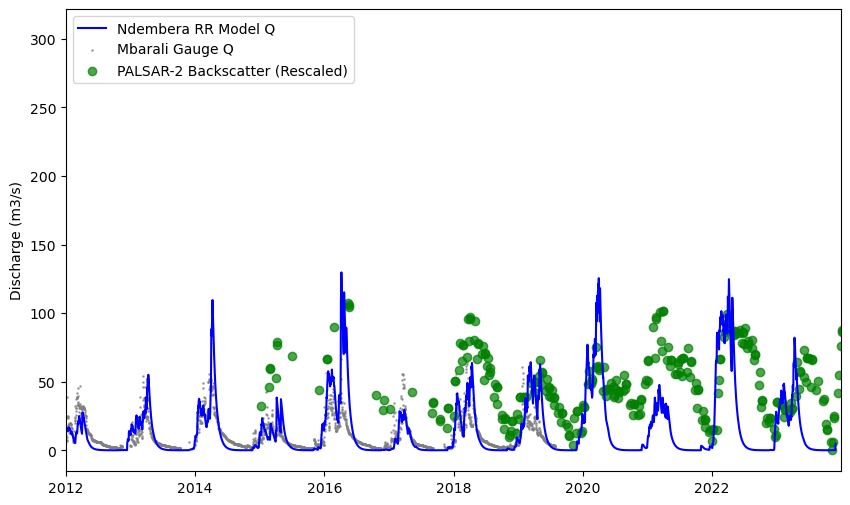

In [51]:
# plot all on one plot
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(model_ndembera_Q.index, model_ndembera_Q["Ndembera"], label="Ndembera RR Model Q", color="blue")
ax1.scatter(gauge_mbarali.index, gauge_mbarali["Discharge"], label="Mbarali Gauge Q", color="gray",alpha=0.7,s=0.7)
ax1.scatter(palsar2_backscatter.index, palsar2_backscatter["HH-2HV_norm"], label="PALSAR-2 Backscatter (Rescaled)", color="green",alpha=0.7)
ax1.set_ylabel("Discharge (m3/s)")
# limit x axis to 2000-2023
ax1.set_xlim(pd.to_datetime("2012-01-01"), pd.to_datetime("2023-12-31"))
ax1.legend(loc="upper left")


In [39]:
palsar2_backscatter

,Unnamed: 0,HH-2HV
time,,
2015-01-10,0,852.321
2015-02-21,1,1687.502
2015-02-26,2,2439.335
2015-02-26,3,2456.943
2015-04-04,4,2067.726
...,...,...
2025-08-09,353,1564.566
2025-08-23,354,1350.914
2025-09-20,355,882.352
